# LeNet

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Convolution2D, MaxPool2D, MaxPooling2D, Dropout, Conv2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import os
import glob

Using TensorFlow backend.


In [3]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
training_set=train_datagen.flow_from_directory('dataset/train',target_size=(256,256),batch_size=32,class_mode='categorical')

Found 2424 images belonging to 5 classes.


In [4]:
test_datagen=ImageDataGenerator(rescale=1./255)
test_set=test_datagen.flow_from_directory('dataset/test',target_size=(256,256),batch_size=32,class_mode='categorical')

Found 735 images belonging to 5 classes.


In [5]:
Classifier=Sequential()
Classifier.add(Convolution2D(32,3,3,input_shape=(256,256,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(5, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 85, 85, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
____

In [6]:
model_path = "LeNet.h5"

callbacks = [
    ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)
]

In [7]:
epochs = 50
batch_size = 32

In [8]:
#### Fitting the model
history = Classifier.fit(
           training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size,
           callbacks=callbacks)

Epoch 1/50
75/75 [==============================] - 58s 779ms/step - loss: 1.6587 - acc: 0.2224 - val_loss: 1.5564 - val_acc: 0.2812
Epoch 2/50
75/75 [==============================] - 31s 418ms/step - loss: 1.5373 - acc: 0.3064 - val_loss: 1.4878 - val_acc: 0.3423
Epoch 3/50
75/75 [==============================] - 31s 415ms/step - loss: 1.4743 - acc: 0.3579 - val_loss: 1.4345 - val_acc: 0.4091
Epoch 4/50
75/75 [==============================] - 31s 410ms/step - loss: 1.4331 - acc: 0.4047 - val_loss: 1.4140 - val_acc: 0.4276
Epoch 5/50
75/75 [==============================] - 31s 411ms/step - loss: 1.3997 - acc: 0.4080 - val_loss: 1.3675 - val_acc: 0.4474
Epoch 6/50
75/75 [==============================] - 31s 410ms/step - loss: 1.3621 - acc: 0.4344 - val_loss: 1.3519 - val_acc: 0.4545
Epoch 7/50
75/75 [==============================] - 31s 411ms/step - loss: 1.3460 - acc: 0.4448 - val_loss: 1.3955 - val_acc: 0.4318
Epoch 8/50
75/75 [==============================] - 31s 415ms/step - 

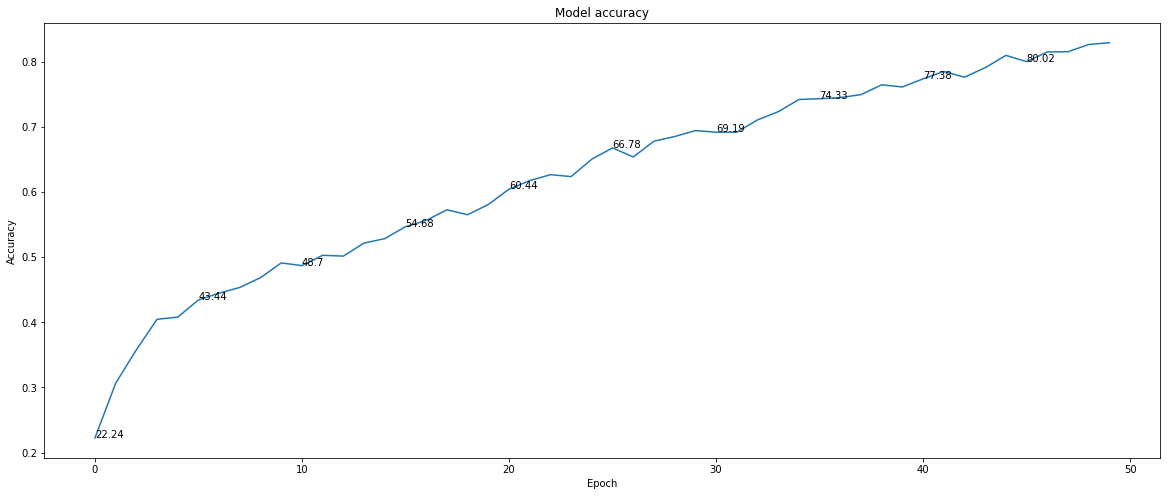

In [9]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['acc'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['acc'][i]*100,2),xy=(i,history.history['acc'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

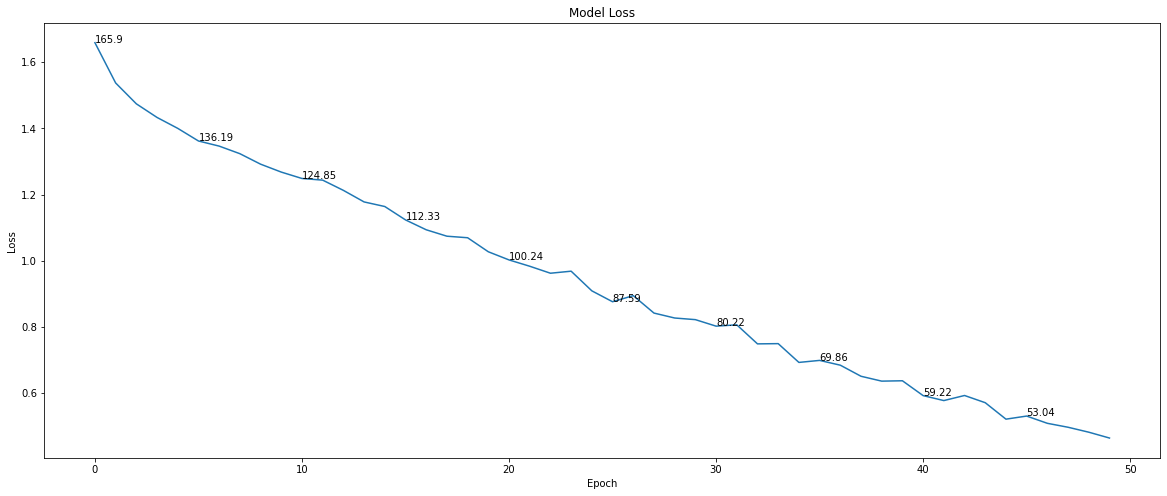

In [10]:
plt.figure(figsize=(20, 8))
plt.plot(history.history['loss'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['loss'][i]*100,2),xy=(i,history.history['loss'][i]))

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [11]:
import h5py
Classifier.save('Lenet.h5')